##### Copyright 2019 The TensorFlow Authors.

In [98]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

!pip install seaborn
!pip install sklearn

In [99]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from scipy.stats import multivariate_normal, boxcox, norm
import os
import random
from PIL import Image, ImageDraw, ImageFont
import copy
%matplotlib inline

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

physical_devices

Num GPUs: 1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [100]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

print(physical_devices)
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Num GPUs: 1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [101]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28), name = "layer1"),
  tf.keras.layers.Dense(128, activation='relu', name = "layer2"),
  tf.keras.layers.Dropout(0.2, name = "layer3"),
  tf.keras.layers.Dense(10, name = "layer4")
])

For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [102]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.9463464 , -0.266343  , -0.04880235,  0.22699858, -0.3754505 ,
        -0.41556945,  0.3597965 ,  0.0431928 , -0.15565343, -0.6682699 ]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [103]:
tf.nn.softmax(predictions).numpy()

array([[0.04537666, 0.08956828, 0.11133482, 0.14669314, 0.08030997,
        0.0771518 , 0.16752638, 0.12206299, 0.10005208, 0.05992385]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [104]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [105]:
loss_fn(y_train[:1], predictions).numpy()

2.5619802

In [106]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [107]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2941 - accuracy: 0.9154
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1434 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1090 - accuracy: 0.9665
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0895 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0761 - accuracy: 0.9767


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [108]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0713 - accuracy: 0.9780


[0.07128695398569107, 0.9779999852180481]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [109]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [110]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.07706160e-06, 1.05047970e-09, 1.34845068e-05, 2.73656944e-04,
        7.40956324e-11, 1.19316937e-07, 1.12967413e-11, 9.99517560e-01,
        4.05336664e-07, 1.93684478e-04],
       [8.84173013e-11, 1.99225658e-04, 9.99800622e-01, 1.13386854e-07,
        1.35567414e-12, 3.74859865e-10, 2.88295854e-09, 5.52907939e-14,
        2.46319960e-08, 2.94271985e-13],
       [8.97469761e-08, 9.98794436e-01, 9.32643161e-05, 5.93941422e-06,
        4.73549226e-05, 4.11397878e-06, 2.56398125e-05, 9.52823611e-04,
        7.37966475e-05, 2.56177282e-06],
       [9.99718249e-01, 9.48833545e-08, 1.07063097e-04, 2.17326701e-07,
        6.31764408e-07, 2.65738822e-06, 1.54088251e-04, 1.89951848e-07,
        1.34426221e-08, 1.67394537e-05],
       [2.72206744e-05, 2.41855140e-08, 8.40171051e-05, 1.68299391e-06,
        9.89826679e-01, 1.30473063e-06, 1.54945556e-05, 1.18667667e-04,
        6.22309108e-06, 9.91867669e-03]], dtype=float32)>

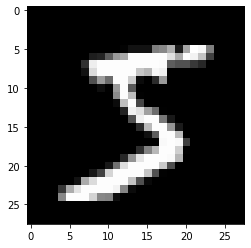

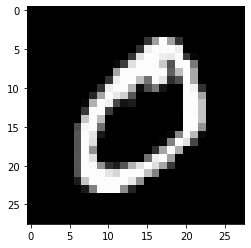

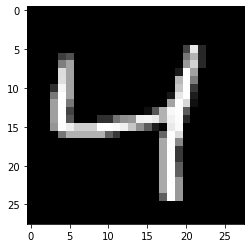

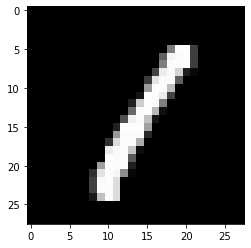

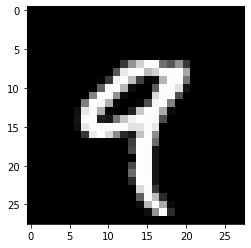

In [111]:
for i in range(5):    
    plt.imshow(x_train[i], cmap='gray')
    plt.show()

In [112]:
x_train[i].shape

(28, 28)

In [113]:
proba_df = pd.DataFrame(model.predict(x_train))

In [114]:
proba_df_melt = proba_df.melt()

In [115]:
proba_df_melt.head()

,variable,value
0,0,-12.884901
1,0,15.412000
2,0,-5.495498
3,0,-8.950511
4,0,-9.290295


In [116]:
number_dict = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}

In [117]:
proba_df_melt['variable'] = [number_dict[x] for x in proba_df_melt['variable'].values]

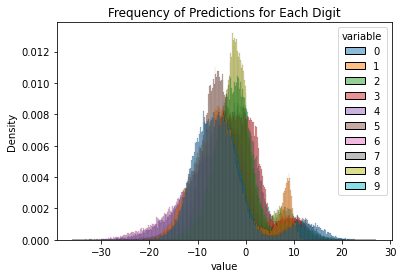

In [118]:
sns.histplot(data=proba_df_melt, x="value", hue='variable', stat="density")
plt.title("Frequency of Predictions for Each Digit")
plt.show()

# Extract Features from Model at Higher layers in the network

In [119]:

features_layer2 = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="layer2").output,
)

features_layer2

print(features_layer2)

In [120]:
proba_df = pd.DataFrame(features_layer2.predict(x_train))

In [121]:
proba_df.shape

(60000, 128)

# PCA to Reduce 128 dimensions to 5 most important

In [122]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(proba_df)

model

print(pca.explained_variance_ratio_)

print(pca.singular_values_)
print("5 PCs descibe {0}% of the data".format(np.sum(pca.explained_variance_ratio_)))

[0.1303044  0.11180881 0.10950654 0.06524826 0.05551934]
[973.38916 901.6645  892.33307 688.7973  635.37354]
5 PCs descibe 0.4723873436450958% of the data


In [123]:
proba_df = pd.DataFrame(pca.transform(proba_df))

In [124]:
proba_df_melt = proba_df.melt()

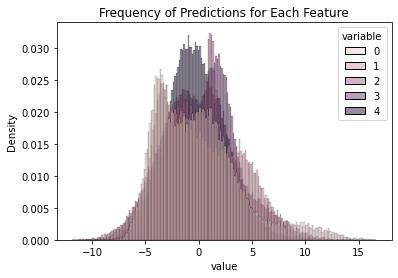

In [125]:
sns.histplot(data=proba_df_melt, x="value", hue='variable', stat="density")
plt.title("Frequency of Predictions for Each Feature")
plt.show()

# Detecting Anomalies from Features

In [126]:
covariance = np.cov(proba_df.T)
means = np.mean(proba_df)

In [127]:
mvn = multivariate_normal(cov=covariance, mean=means)
feature_probas = mvn.pdf(proba_df)

In [128]:
feature_probas

array([1.95000148e-06, 8.99968320e-08, 1.00477723e-05, ...,
       5.48481415e-07, 1.98173736e-06, 2.19073329e-05])

In [129]:
proba_df
X_ = copy.copy(proba_df)

In [130]:
threshold = np.quantile(feature_probas, .05)

In [131]:
print("Anomaly Threshold = {0}".format(threshold))

Anomaly Threshold = 6.994031147264743e-08


In [132]:
X_['anomaly'] = feature_probas < threshold

In [133]:
X_ = X_.sample(500)

In [134]:
# Anomalies in 5 most import Latent Features in the Netork

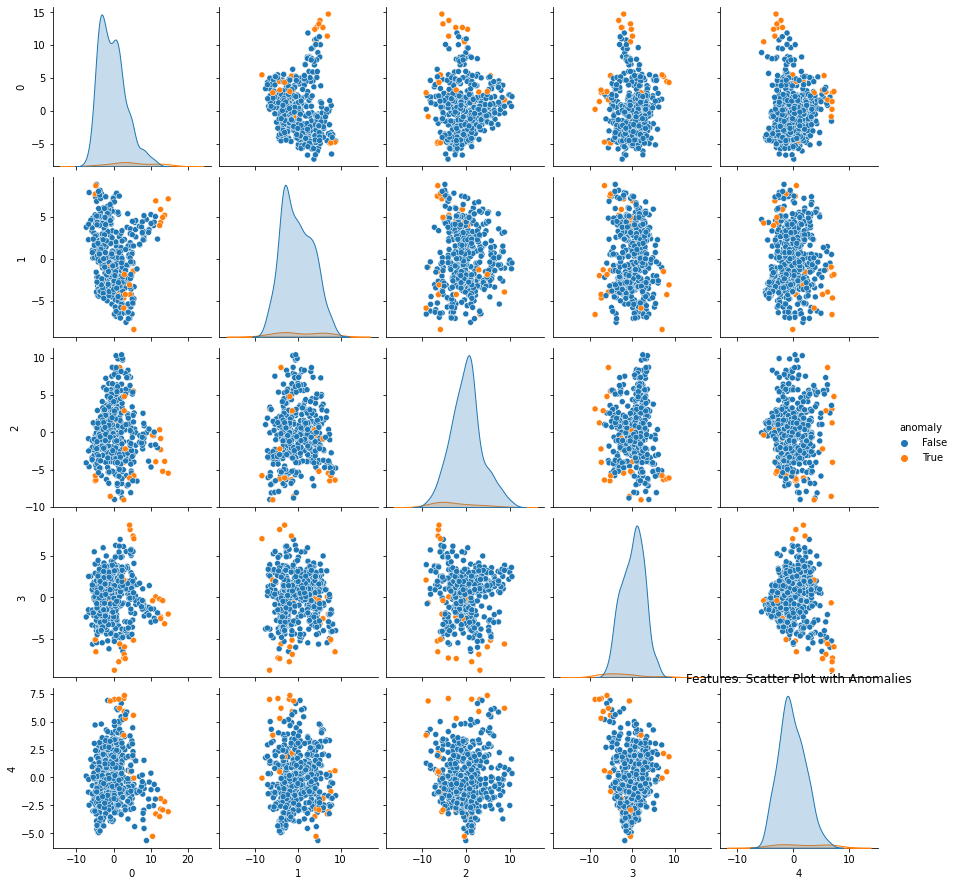

In [135]:
sns.pairplot(X_, hue="anomaly")
plt.title("Features: Scatter Plot with Anomalies")
plt.show()

# Use MNIST trained model on TypeFace Digits

In [136]:
from PIL import Image, ImageDraw, ImageFont

In [137]:
# Get Fonts

In [138]:
myfonts = []
for i in os.listdir('Fonts'):
    path = 'Fonts/' + i
    for font in os.listdir(path):
        myfonts.append(path + '/' + font)

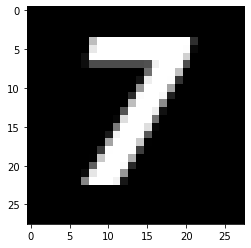

In [139]:
f = random.choice(myfonts)
font = ImageFont.truetype(random.choice(myfonts), 26)
num = random.choice([0,1,2,3,4,5,6,7,8,9])
im = Image.new("L", (28, 28), "black")
d = ImageDraw.Draw(im)
d.text((14, 23), str(num), fill="white", anchor="ms", font=font)
pixels = np.array(im.getdata()).reshape(28,28)
pixels = pixels/255
plt.imshow(pixels, cmap='gray')
plt.show()

In [140]:
pixels.shape

(28, 28)

In [141]:
pixels = pixels.reshape(1,28,28)
pred = np.argmax(model.predict(pixels))
print("Tensorflow prediction {0}".format(pred))

Tensorflow prediction 2


In [142]:
# Extract Features and find PCs

In [143]:
typeface = pca.transform(features_layer2.predict(pixels))

In [144]:
# PCs of typeface digit
typeface

array([[ 0.5304972 , -5.970936  ,  0.14464203, -5.8125806 ,  3.4599333 ]],
      dtype=float32)

# Show this on the scatter plot

In [145]:
X_['anomaly'] = [x*1 for x in X_['anomaly']]

In [146]:
typeface = list(typeface[0])
typeface.append(2)
typeface = pd.DataFrame(typeface).T

In [147]:
typeface.columns = [0,1,2,3,4,"anomaly"]

In [148]:
X1 = X_.append(typeface)

In [149]:
X1.reset_index()

,index,0,1,2,3,4,anomaly
0,33750,-1.945108,-3.228323,1.977371,-2.170011,-2.302648,0.0
1,37761,0.545780,-4.605299,1.592957,-3.762275,-1.283433,0.0
2,3982,-5.582001,0.079449,-1.122509,0.751453,-2.992495,0.0
3,11712,4.112653,1.270024,-1.310591,-0.117760,-0.149900,0.0
4,13863,-1.801629,-1.018916,1.345355,1.332275,-3.261518,0.0
...,...,...,...,...,...,...,...
496,51193,-4.548664,5.077808,-2.207491,-0.748072,-1.293714,0.0
497,19489,0.822513,-3.486979,-1.156625,-0.465599,2.437969,0.0
498,21969,-0.943251,6.443675,-0.667157,0.917277,3.245387,0.0
499,25359,4.605102,-0.369369,-8.096446,5.692147,1.086631,0.0


In [150]:
import warnings
warnings.filterwarnings("ignore")

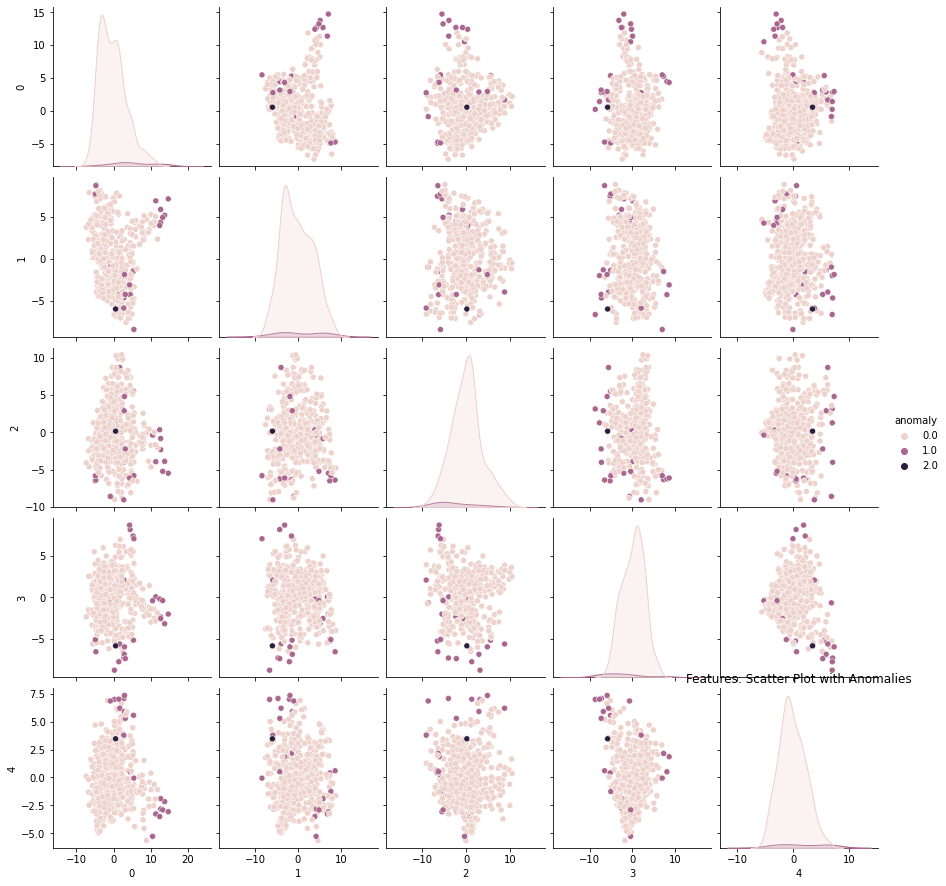

In [151]:
sns.pairplot(X1, hue="anomaly")
plt.title("Features: Scatter Plot with Anomalies")
plt.show()

# Statistics

In [152]:
anomalies = []
for i in range(100):
    try:
        f = random.choice(myfonts)
        font = ImageFont.truetype(random.choice(myfonts), 26)
        num = random.choice([0,1,2,3,4,5,6,7,8,9])
        im = Image.new("L", (28, 28), "black")
        d = ImageDraw.Draw(im)
        d.text((14, 23), str(num), fill="white", anchor="ms", font=font)
        pixels = np.array(im.getdata()).reshape(28,28)
        pixels = pixels/255
        anomalies.append(pixels)
    except:
        continue
    #plt.imshow(pixels, cmap='gray')
    #plt.show()

In [153]:
anomalies = np.array(anomalies)

In [154]:
anomalies.shape

(88, 28, 28)

In [156]:
typeface = pca.transform(features_layer2.predict(anomalies))

In [157]:
typeface = pd.DataFrame(typeface)
#typeface.append(2)
#typeface = pd.DataFrame(typeface).T

In [158]:
typeface['anomaly'] = 2

In [160]:
X_ = X_.append(typeface)

## TypeFace looks like subset of handwritten

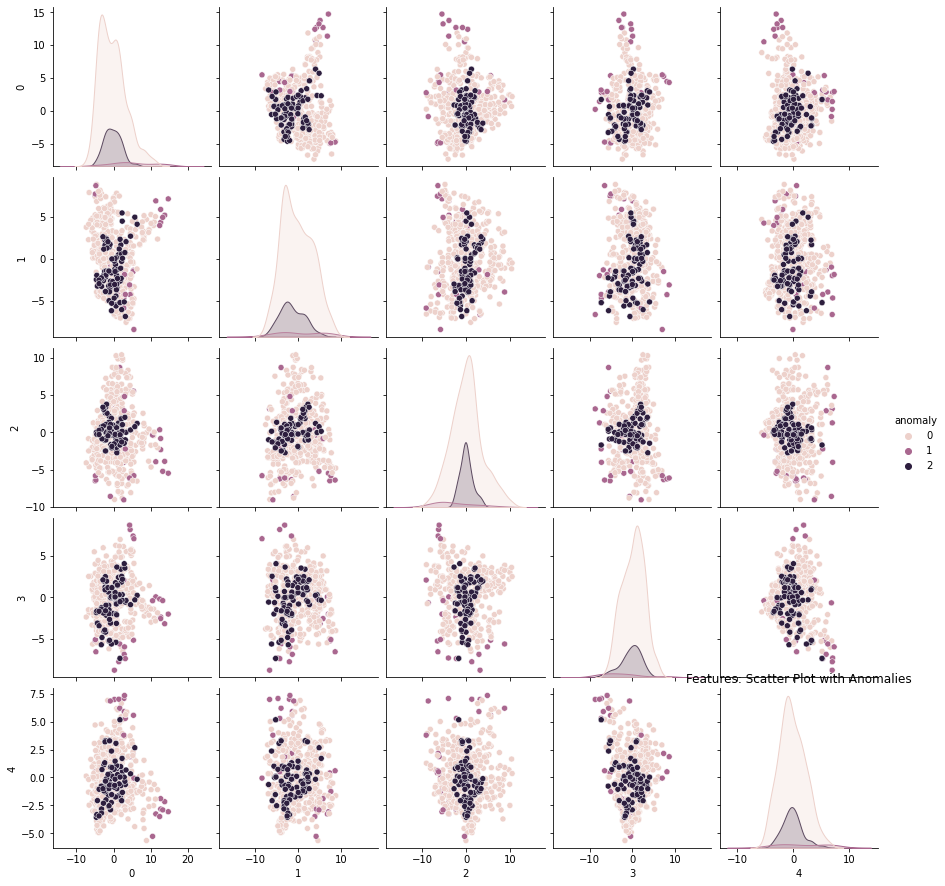

In [164]:
sns.pairplot(X_, hue="anomaly")
plt.title("Features: Scatter Plot with Anomalies")
plt.show()

# Means haven't changed has variance

In [165]:
from scipy.special import rel_entr

https://machinelearningmastery.com/divergence-between-probability-distributions/

In [282]:
KL = []
for i in range(5):
    A, _ = np.histogram(typeface[i])
    # A, _ = np.histogram(X1.sample(100)[i], bins = 10)
    B, _ = np.histogram(X1[i], bins = 10)
    kl_pq = rel_entr(A, B)
    KL.append(sum(kl_pq))

In [283]:
np.linalg.norm(KL)

311.8237649568279